# Assignment 5
# Cezar Budeci, Samantha Bergdahl

# Find the probability for "Finnish male height is less than 170cm" using normal distribution, normalization and the Z-table

mean = 181   
std = 6.1   
X = 170   
   
Calculate the Z value for X with the formula: Z = (X - mean)/std   
Z = (170 - 181)/6.1 = -1.80

Use the Z-table for negative values, by positioning first 2 digits on y axis and last digit (second decimal) on x axis.
In our case is 0.0359. Multiply by 100 to get the percentages: 0.0359 * 100 = 3.59%. This means that 96.41% of the finnish men are taller than 170cm

# How would you use Python to test the normality of variable age for the data in Topic4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import numpy.random as npr

In [2]:
df = pd.read_csv('data1_eng.csv', sep = ';', decimal = ',')

In [3]:
df.describe()

,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


## Graphs

### Frequency plot

Text(0, 0.5, 'Count')

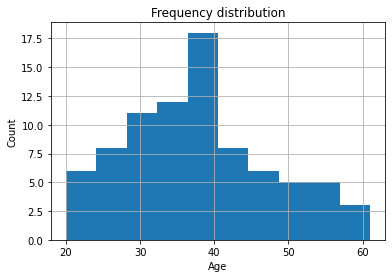

In [4]:
df['age'].hist()
plt.title("Frequency distribution")
plt.xlabel("Age")
plt.ylabel("Count")

### Q-Q plot

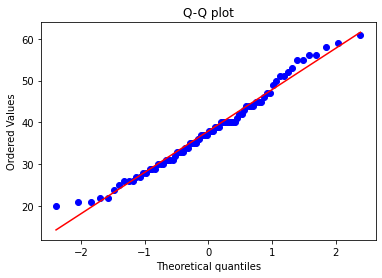

In [5]:
stats.probplot(df['age'], dist = 'norm', plot=pylab)
pylab.title("Q-Q plot")
pylab.show()

## Normality tests

In [6]:
def hypothesis_check(p):
    if p > 0.05:
        return 'Null hypothesis: Values are sampled from a population that follows normal distribution'
    return 'Alternative hypothesis: Values are not sampled from a population that follows normal distribution'

### D'Agostino-Pearson omnibus

In [7]:
result = stats.normaltest(df['age'])
print(result)
print(hypothesis_check(result.pvalue))

NormaltestResult(statistic=2.3302085963588692, pvalue=0.31189013076337785)
Null hypothesis: Values are sampled from a population that follows normal distribution


### Shapiro-Wilk

In [8]:
result = stats.shapiro(df['age'])
print(result)
print(hypothesis_check(result.pvalue))

ShapiroResult(statistic=0.9784223437309265, pvalue=0.18238654732704163)
Null hypothesis: Values are sampled from a population that follows normal distribution


### Kolmogorov-Smirnov

In [9]:
print('Age mean: {}'.format(df['age'].mean()))
print('Age std: {}'.format(df['age'].std()))
print('Age count: {}'.format(df['age'].count()))

Age mean: 37.951219512195124
Age std: 9.77386593342434
Age count: 82


In [10]:
normal_dist = npr.normal(loc = 37.951219512195124, scale = 9.77386593342434, size = 82)
result = stats.kstest(df['age'], normal_dist)
print(result)
print(hypothesis_check(result.pvalue))

KstestResult(statistic=0.10975609756097561, pvalue=0.7098846884915191)
Null hypothesis: Values are sampled from a population that follows normal distribution


<AxesSubplot:>

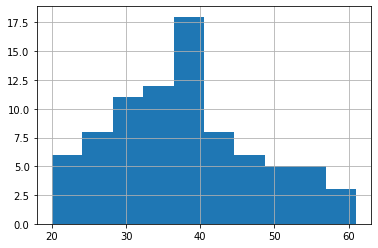

In [11]:
df['age'].hist()

(array([ 1.,  7.,  9., 16., 23., 11.,  9.,  2.,  3.,  1.]),
 array([16.53192614, 21.51366957, 26.49541299, 31.47715642, 36.45889985,
        41.44064327, 46.4223867 , 51.40413013, 56.38587355, 61.36761698,
        66.34936041]),
 <BarContainer object of 10 artists>)

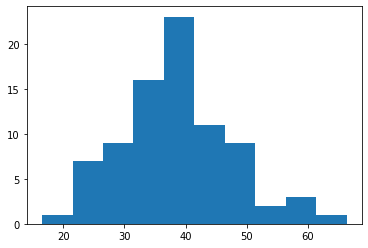

In [12]:
plt.hist(normal_dist)